In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [127]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

<h1>Data Cleaning</h1>

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [129]:
df.drop(['Status' , 'unnamed1'], axis=1, inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [131]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [132]:
#droping null value rows
df.dropna(inplace=True)

In [133]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [135]:
#Changing the data type of any data
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [136]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [137]:
#Renaming a Column
df.rename(columns={'Marital_Status':'Married'}, inplace=True)

In [138]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


In [139]:
#Data Cleaning Done

<h1>Analysing the Data</h1>

<h2>Gender</h2>

In [140]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

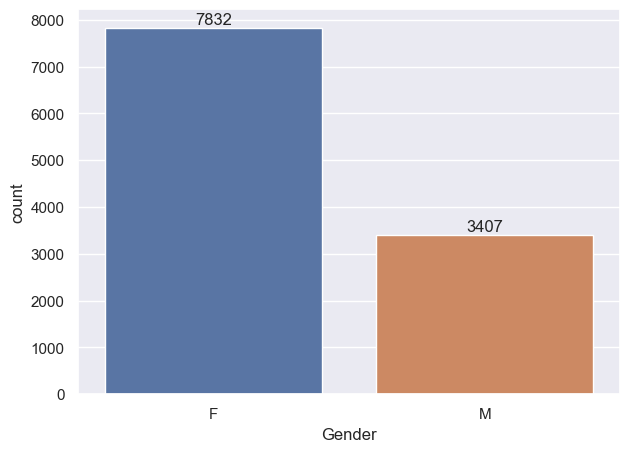

In [187]:
gen = sns.countplot(x = 'Gender', data = df)

for bars in gen.containers:
    gen.bar_label(bars)     #giving values on top of bars
    
sns.set(rc={'figure.figsize':(7,5)})

<h3>Females customers are more than 2.3x of Male customers</h3>

In [142]:
   #Generating data of total(sum) amount purchased and sorting it

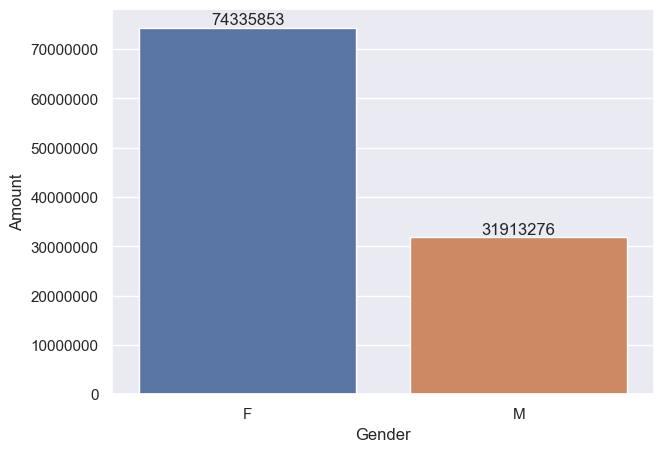

In [185]:
gen_sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)
gen_sales_plot = sns.barplot(x ='Gender',y = 'Amount', data = gen_sales)

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y') #Converting data from scientific notation tpo actual number

for bars in gen_sales_plot.containers:
    gen_sales_plot.bar_label(bars, fmt='%.f')#Converting data from scientific notation tpo actual number on top of bars
sns.set(rc={'figure.figsize':(7,5)})

<h4><i>Number of Female customes and their Purchasing power is more than that of Male customes</i></h4>
   

<h2>Age</h2>

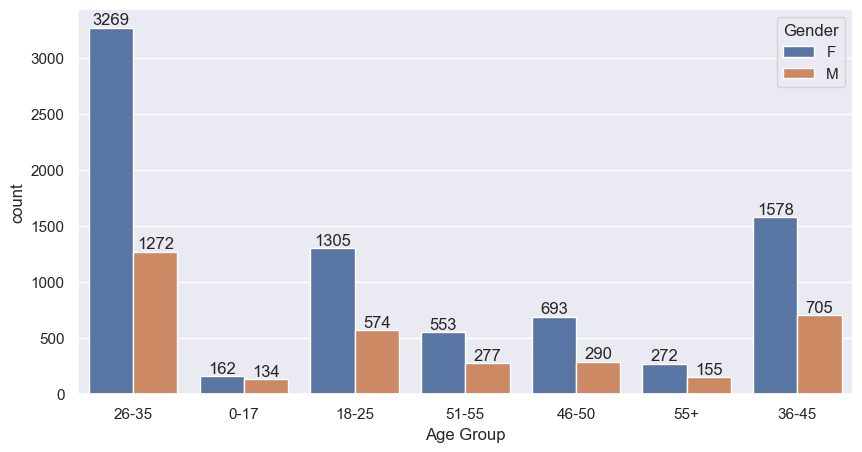

In [175]:
age_gp = sns.countplot(x = 'Age Group', data = df , hue='Gender')

for bars in age_gp.containers:
    age_gp.bar_label(bars)     #giving values on top of bars

sns.set(rc={'figure.figsize':(10,5)})

<h4><i>Most of the customer from each Age Group and are Female<i></h4>

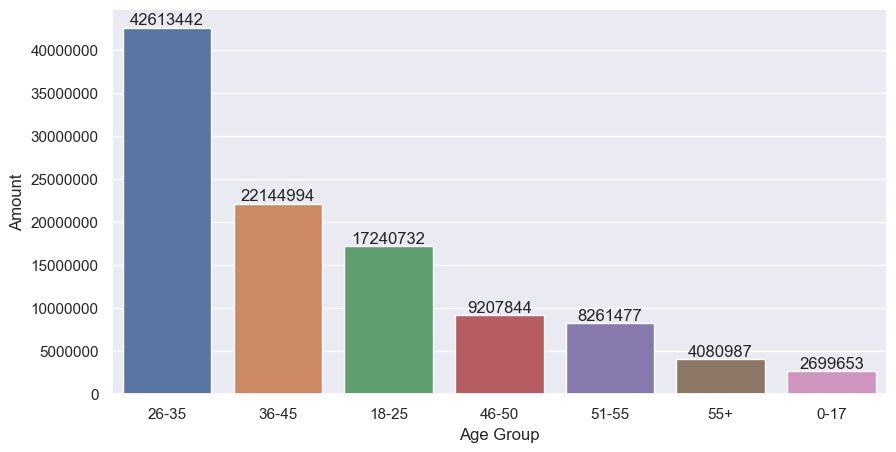

In [177]:
age_gp_sales  = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False )
age_gp_sales_plot = sns.barplot(x ='Age Group',y = 'Amount', data = age_gp_sales)

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y') #Converting data from scientific notation tpo actual number

for bars in age_gp_sales_plot.containers:
    age_gp_sales_plot.bar_label(bars, fmt='%.f')     #Converting data from scientific notation tpo actual number on top of bars
    
sns.set(rc={'figure.figsize':(10,5)})

<h4><em>Most of the Buyers with highest purchasing power are from the Age Group of 26-35</em></h4>

<h2>State</h2>

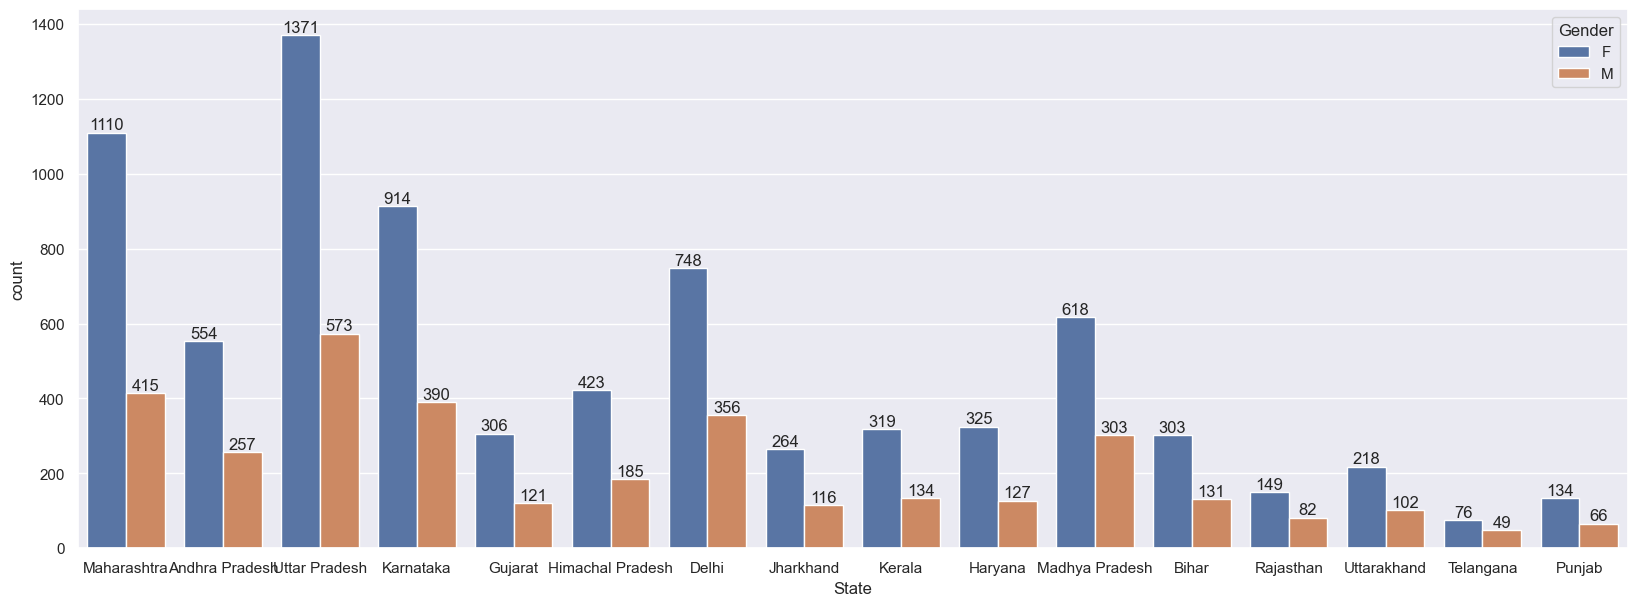

In [173]:
st = sns.countplot(x = 'State', data = df , hue='Gender')

for bars in st.containers:
    st.bar_label(bars)     #giving values on top of bars
    
sns.set(rc={'figure.figsize':(20,7)})     #Changing the axis and bar sizes

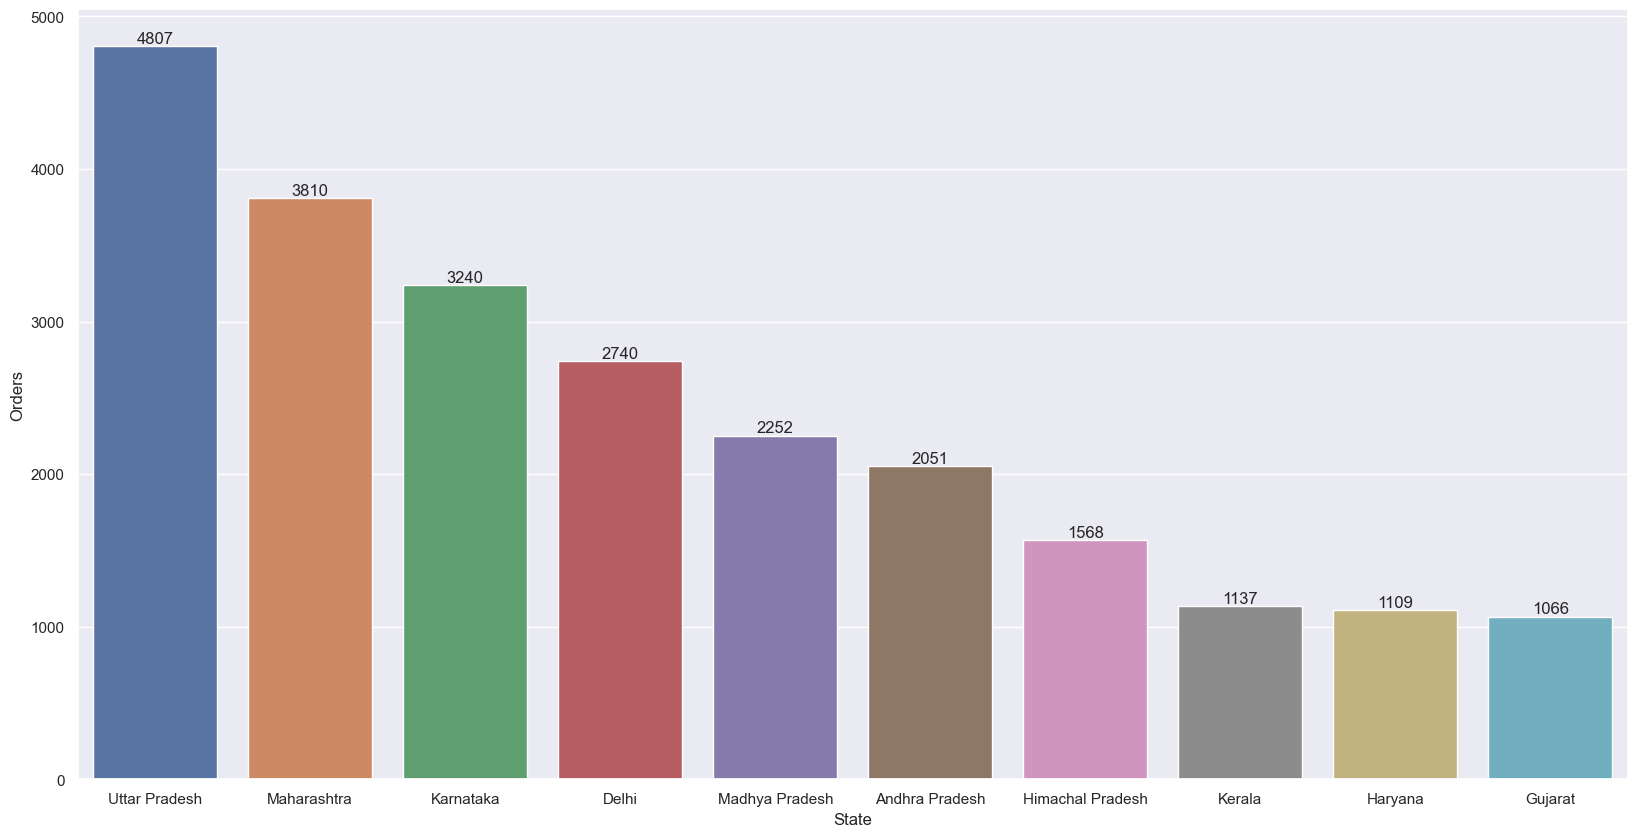

In [147]:
st_sales  = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending=False ).head(10)

st_sales_plot = sns.barplot(x ='State',y = 'Orders', data = st_sales)

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y')  #Converting data from scientific notation tpo actual number

for bars in st_sales_plot.containers:
    st_sales_plot.bar_label(bars)          #Converting data from scientific notation tpo actual number on top of bars


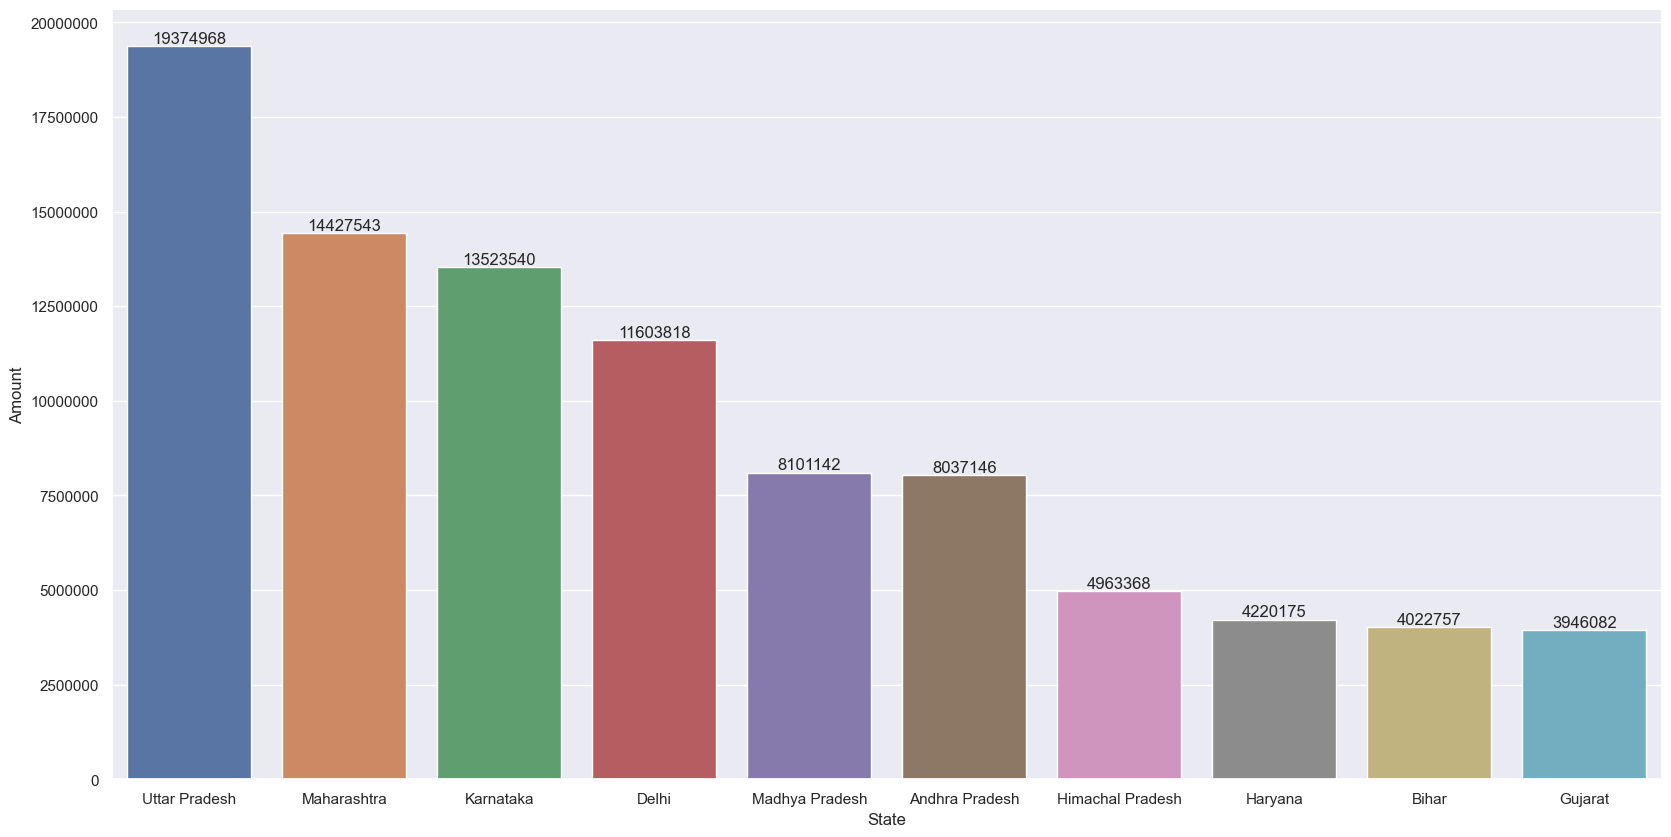

In [148]:
st_sales  = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False ).head(10)

st_sales_plot = sns.barplot(x ='State',y = 'Amount', data = st_sales)

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y')  #Converting data from scientific notation tpo actual number

for bars in st_sales_plot.containers:
    st_sales_plot.bar_label(bars, fmt='%.f')          #Converting data from scientific notation tpo actual number on top of bars


<h4><i>Most of the Orders are from Utter Pradesh , Maharashtra and karnataka and their order/sale Amount is also high<i></h4>

<h2>Married</h2>

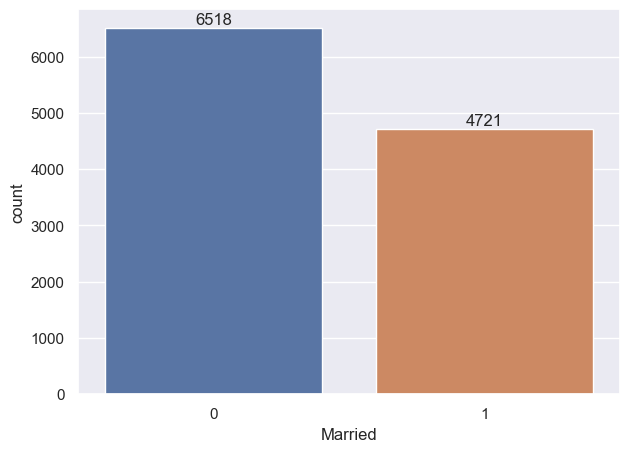

In [160]:
mar = sns.countplot(x = 'Married', data = df)

for bars in mar.containers:
     mar.bar_label(bars)     #giving values on top of bars

sns.set(rc={'figure.figsize':(7,5)}) 

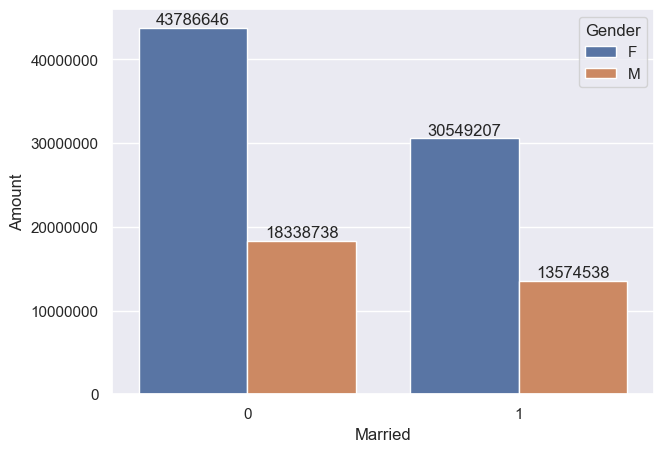

In [161]:
mar_sales  = df.groupby(['Married' , 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False ).head(10)

mar_sales_plot = sns.barplot(data = mar_sales ,x ='Married',y = 'Amount', hue='Gender')

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y')  #Converting data from scientific notation tpo actual number

for bars in mar_sales_plot.containers:
    mar_sales_plot.bar_label(bars, fmt='%.f')          #Converting data from scientific notation tpo actual number on top of bars
sns.set(rc={'figure.figsize':(7,5)}) 

<h4><em>Most of the Customers are Unmarried Females</h4>

<h2>Occupation</h2>

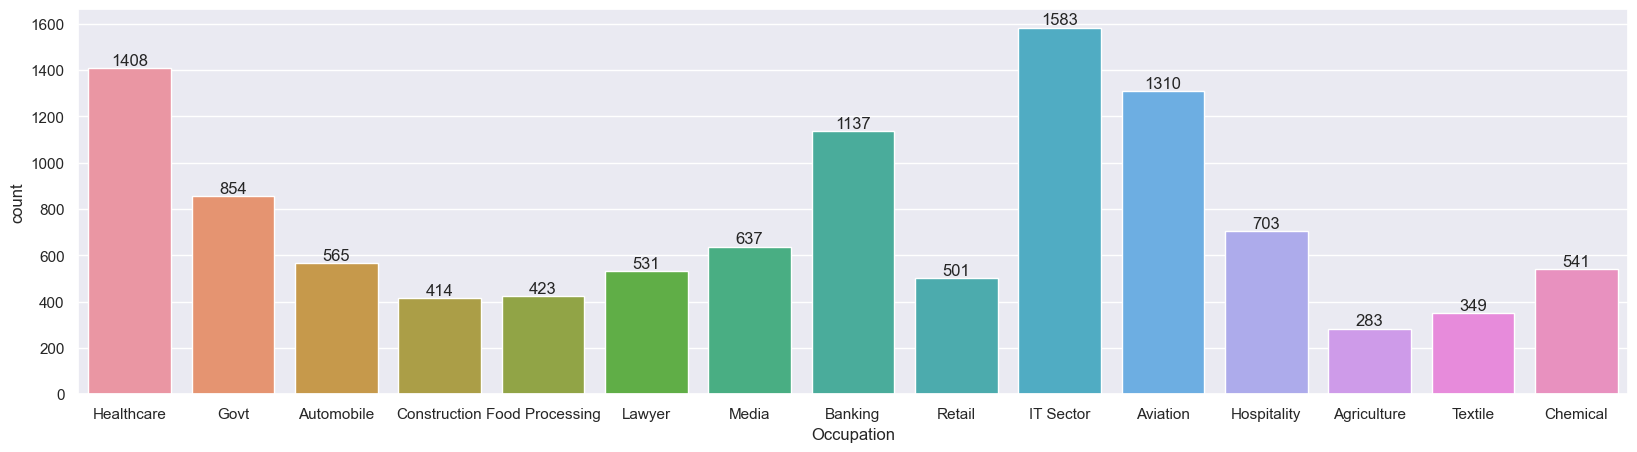

In [163]:
occ = sns.countplot(x = 'Occupation', data = df)

for bars in occ.containers:
     occ.bar_label(bars)     #giving values on top of bars

sns.set(rc={'figure.figsize':(20,5)}) 

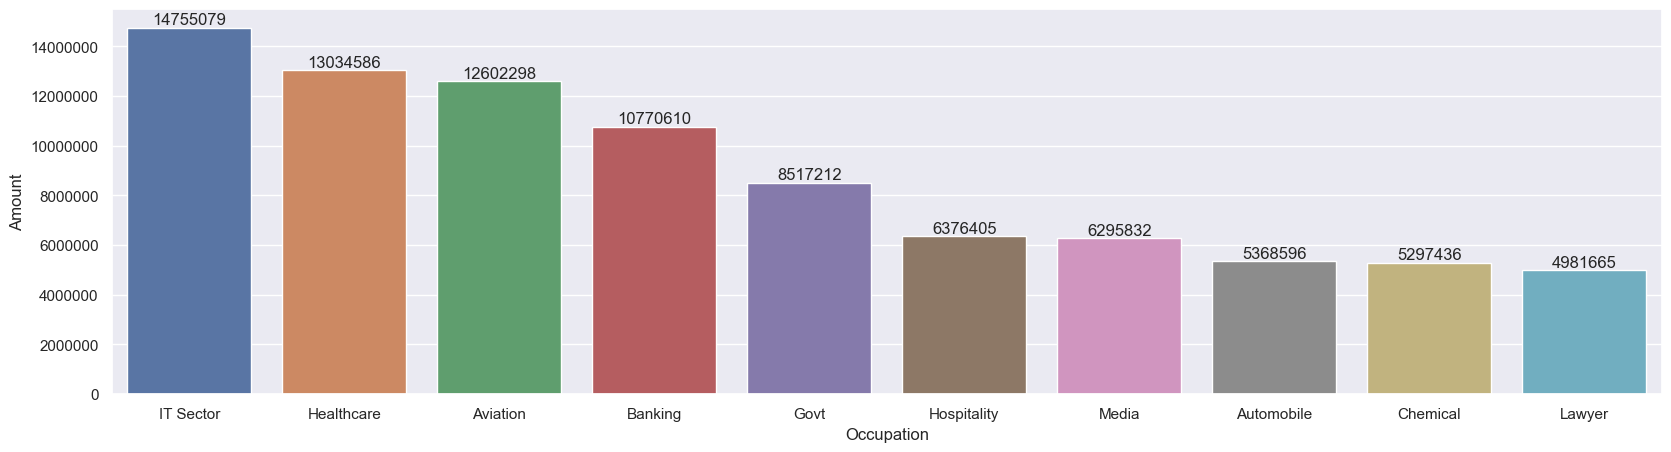

In [165]:
occ_sales  = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False ).head(10)

occ_sales_plot = sns.barplot(data = occ_sales ,x ='Occupation',y = 'Amount')

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y')  #Converting data from scientific notation tpo actual number

for bars in occ_sales_plot.containers:
    occ_sales_plot.bar_label(bars, fmt='%.f')          #Converting data from scientific notation tpo actual number on top of bars
sns.set(rc={'figure.figsize':(20,5)}) 

<h4><i>Most of the customers are working in IT, Healthcare, Aveation and banking Sector</h4>

<h2>Product_Catagory</h2>

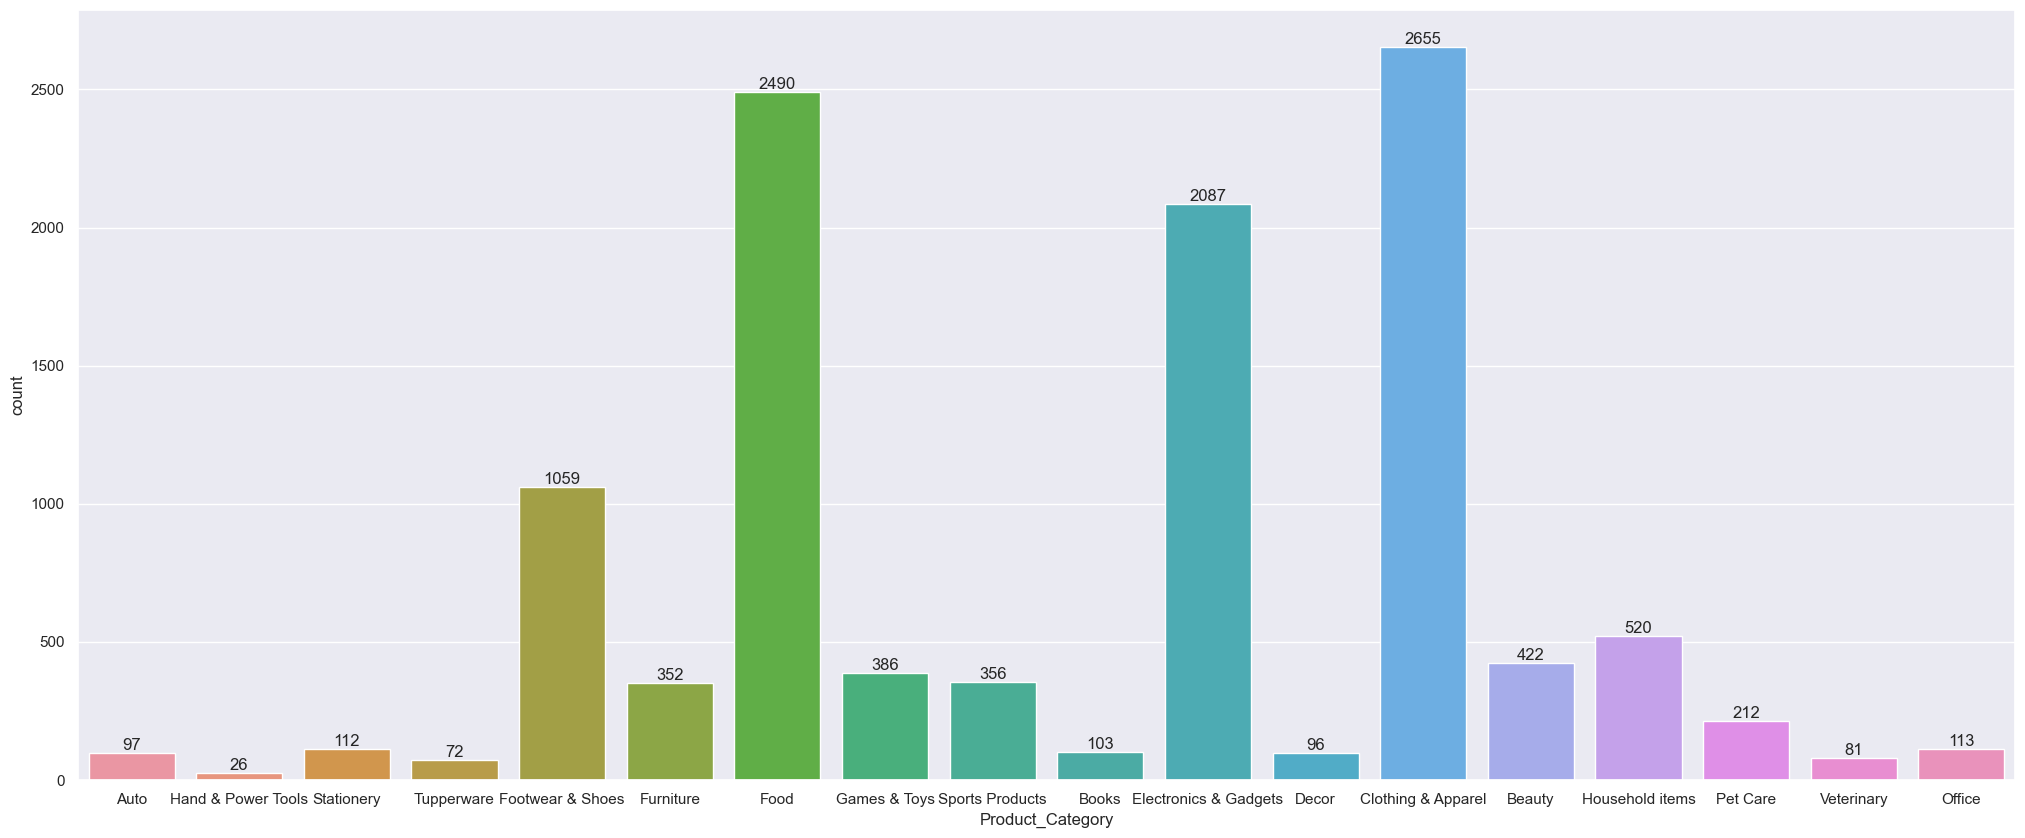

In [167]:
pc = sns.countplot(x = 'Product_Category', data = df)

for bars in pc.containers:
     pc.bar_label(bars)     #giving values on top of bars

sns.set(rc={'figure.figsize':(25,10)}) 

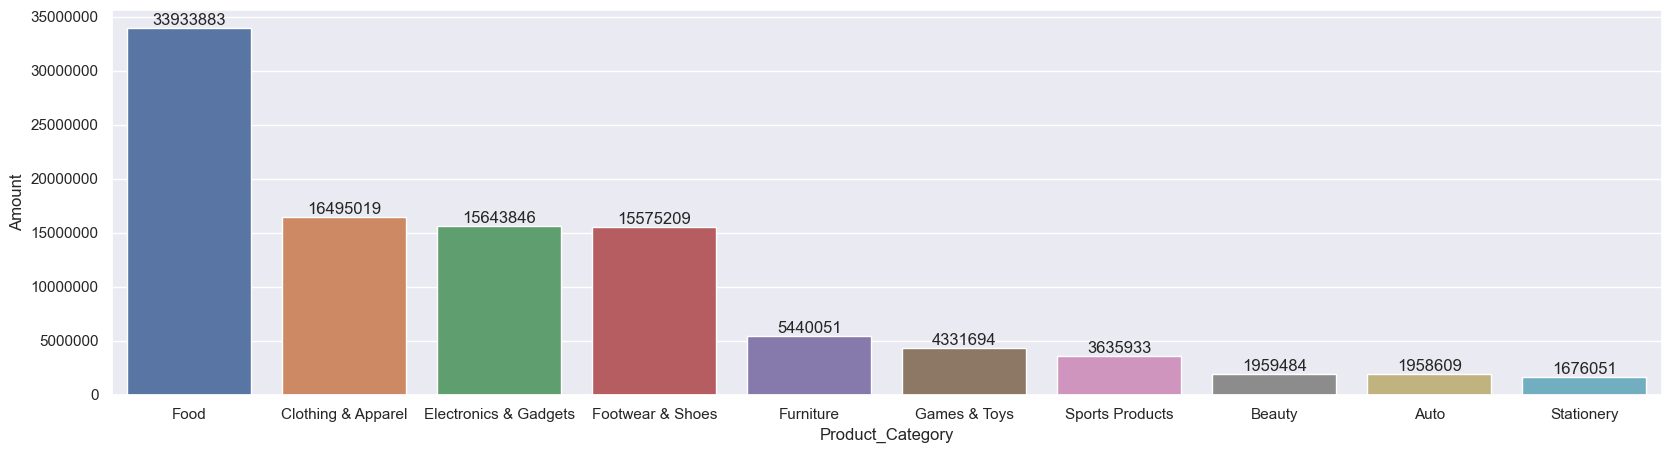

In [169]:
pc_sales  = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False ).head(10)

pc_sales_plot = sns.barplot(data = pc_sales ,x ='Product_Category',y = 'Amount')

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y')  #Converting data from scientific notation tpo actual number

for bars in pc_sales_plot.containers:
    pc_sales_plot.bar_label(bars, fmt='%.f')          #Converting data from scientific notation tpo actual number on top of bars
    
sns.set(rc={'figure.figsize':(20,5)}) 

<h4><i>Most of the Products sold are Cloths, Foods and Electronics in Which Food category has the highest Sales amount

<h2>Product_ID

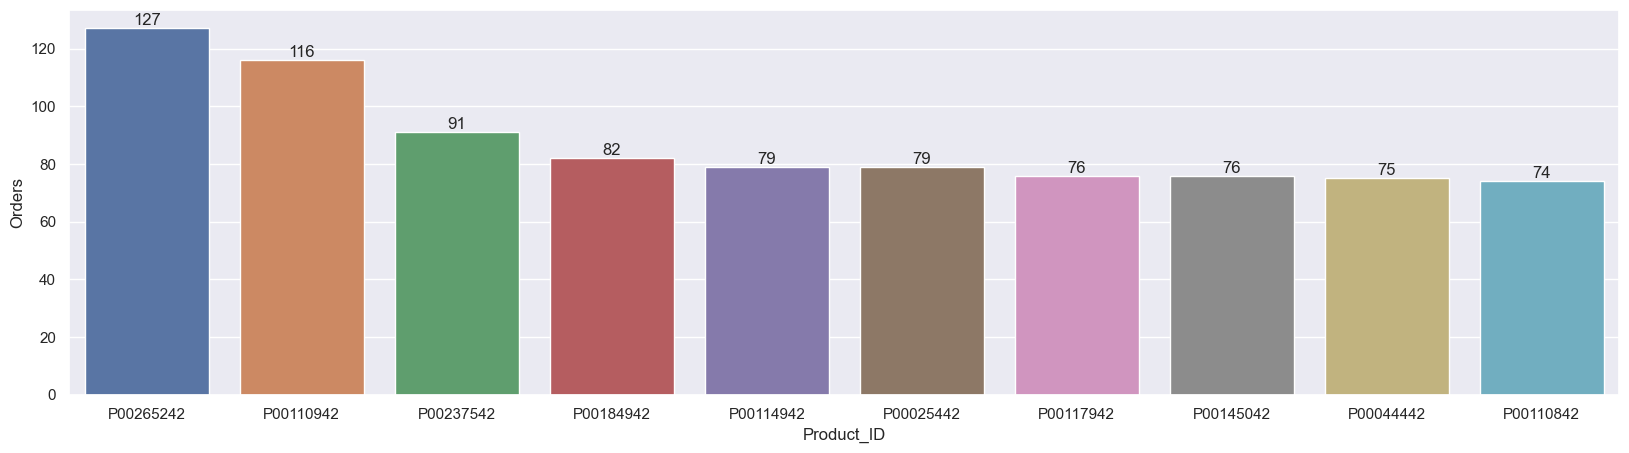

In [171]:
#Top 10 product sold
pc_sales  = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending=False ).head(10)

pc_sales_plot = sns.barplot(data = pc_sales ,x ='Product_ID',y = 'Orders')

# gen_sales_plot.set_ylim(0, 80000000) #setting range till 8E^7

plt.ticklabel_format(style='plain', axis='y')         #Converting data from scientific notation tpo actual number

for bars in pc_sales_plot.containers:
    pc_sales_plot.bar_label(bars, fmt='%.f')          #Converting data from scientific notation tpo actual number on top of bars
    
sns.set(rc={'figure.figsize':(20,5)}) 


<h1>Conclusion

<em>Unmarried Female in the age group of 26-35 from Utter Pradesh , Maharastra , Karnataka working in IT , Healthcarea and Aveation Sector are most likely to buy products in Food, Clothing and Electronics categories